# Load Libraries 

In [1]:
import sys
import re
import math
import MDAnalysis as mda
from MDAnalysis.analysis import align, rms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as g

In [2]:
sys.path.append("/home/jackh/cphmd_tools/cphmd-analysis")
import cphmdanalysis as cphmd
from cphmdanalysis import compute_pkas as pka
from cphmdanalysis import HH_fitting as pka_fit

# Functions

In [3]:
def mindist(sel1, sel2):
    list_o_dist = []
    for a in sel1:
        for b in sel2:
            p1 = a.position
            p2 = b.position
            dist = math.sqrt((p2[2]-p1[2])**2+(p2[1]-p1[1])**2+(p2[0]-p1[0])**2)
            list_o_dist.append(dist)
    return min(list_o_dist) 

# Paths to Files and pH range

In [5]:
phs = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5]
path = '/data/jackh/plasmepsin/apo_plasmepsin/run'
pdb = str(path)+'/plasmepsin.pdb'
psf = str(path)+'/plasmepsin.psf'
sstage = 11
lstage = 65
stages = [x for x in range(sstage, lstage+1)]
nskip = 1

# Load Lambdas

## Seed Lambdas

In [6]:
files = []
for n, ph in enumerate(phs):
    files.append(g.glob('{}/stage{}/*ph{}*lamb*'.format(path, sstage, ph)))

In [7]:
files

[['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph1.0_temp300.0.lamb_0'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph1.5_temp300.0.lamb_2'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph2.0_temp300.0.lamb_4'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph2.5_temp300.0.lamb_6'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph3.0_temp300.0.lamb_8'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph3.5_temp300.0.lamb_10'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph4.0_temp300.0.lamb_12'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph4.5_temp300.0.lamb_14'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph5.0_temp300.0.lamb_16'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph5.5_temp300.0.lamb_17'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph6.0_temp300.0.lamb_18'],
 ['/

In [8]:
l_data = [cphmd.lambda_data(x[0]) for x in files]

## Add Files

In [9]:
for rep, ph in enumerate(phs):
    for n in stages[1:]:
        file = g.glob('{}/stage{}/*ph{}*lamb*'.format(path, n, ph))
        l_data[rep].add_l_file(file_path=file[0])
        print("{} Added".format(file[0]))

/data/jackh/plasmepsin/apo_plasmepsin/run/stage12/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage13/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage14/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage15/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage16/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage17/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage18/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage19/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage20/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage21/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage22/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jack

/data/jackh/plasmepsin/apo_plasmepsin/run/stage51/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage52/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage53/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage54/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage55/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage56/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage57/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage58/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage59/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage60/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage61/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jack

/data/jackh/plasmepsin/apo_plasmepsin/run/stage35/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage36/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage37/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage38/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage39/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage40/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage41/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage42/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage43/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage44/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage45/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jack

/data/jackh/plasmepsin/apo_plasmepsin/run/stage19/plasmepsin_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage20/plasmepsin_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage21/plasmepsin_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage22/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage23/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage24/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage25/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage26/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage27/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage28/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage29/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/j

/data/jackh/plasmepsin/apo_plasmepsin/run/stage57/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage58/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage59/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage60/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage61/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage62/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage63/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage64/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage65/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage12/plasmepsin_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage13/plasmepsin_ph4.5_temp300.0.lamb_14 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage41/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage42/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage43/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage44/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage45/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage46/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage47/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage48/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage49/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage50/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage51/plasmepsin_ph5.0_temp300.0.lamb_14 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage25/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage26/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage27/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage28/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage29/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage30/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage31/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage32/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage33/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage34/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage35/plasmepsin_ph6.0_temp300.0.lamb_16 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage62/plasmepsin_ph6.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage63/plasmepsin_ph6.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage64/plasmepsin_ph6.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage65/plasmepsin_ph6.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage12/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage13/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage14/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage15/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage16/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage17/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage18/plasmepsin_ph7.0_temp300.0.lamb_20 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage46/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage47/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage48/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage49/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage50/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage51/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage52/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage53/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage54/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage55/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage56/plasmepsin_ph7.5_temp300.0.lamb_19 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage31/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage32/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage33/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage34/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage35/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage36/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage37/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage38/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage39/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage40/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage41/plasmepsin_ph8.5_temp300.0.lamb_23 Added

## Check Data

In [10]:
print('Number of pHs: {}'.format(len(l_data)))
print('Number of titra site: {}'.format(l_data[0].n_ititr))
print('Number of lambda vals: {}'.format(len(l_data[0].lambda_and_x_vals[0])))

Number of pHs: 16
Number of titra site: 96
Number of lambda vals: 27500


In [11]:
import pandas as pd
pd.set_option('display.max_rows', None) # prevents truncation of the dataframe
l_data[0].info_table

Ititr  Ires  Itauto
0       1     4       3
1       2     4       4
2       3     7       3
3       4     7       4
4       5    10       3
5       6    10       4
6       7    19       3
7       8    19       4
8       9    21       3
9      10    21       4
10     11    24       3
11     12    24       4
12     13    34       3
13     14    34       4
14     15    56       1
15     16    56       2
16     17    59       3
17     18    59       4
18     19    67       3
19     20    67       4
20     21    69       3
21     22    69       4
22     23    74       3
23     24    74       4
24     25    89       3
25     26    89       4
26     27   104       3
27     28   104       4
28     29   107       3
29     30   107       4
30     31   112       3
31     32   112       4
32     33   121       3
33     34   121       4
34     35   130       3
35     36   130       4
36     37   137       3
37     38   137       4
38     39   142       3
39     40   142       4
40     41   150       3
41     42   150       4
42     43   161       1
43     44   161       2
44     45   162       3
45     46   162       4
46     47   164       1
47     48   164       2
48     49   174       3
49     50   174       4
50     51   175       3
51     52   175       4
52     53   179       3
53     54   179       4
54     55   185       3
55     56   185       4
56     57   189       1
57     58   189       2
58     59   190       3
59     60   190       4
60     61   198       3
61     62   198       4
62     63   200       1
63     64   200       2
64     65   207       3
65     66   207       4
66     67   214       3
67     68   214       4
68     69   225       3
69     70   225       4
70     71   235       3
71     72   235       4
72     73   258       3
73     74   258       4
74     75   262       3
75     76   262       4
76     77   269       3
77     78   269       4
78     79   271       3
79     80   271       4
80     81   276       1
81     82   276       2
82     83   278       3
83     84   278       4
84     85   279       3
85     86   279       4
86     87   293       3
87     88   293       4
88     89   303       3
89     90   303       4
90     91   314       3
91     92   314       4
92     93   316       3
93     94   316       4
94     95   318       1
95     96   318       2

# Load Data, Make Selections, Analyze 

In [20]:
# Set up lists for plotting 
data = []
for n, ph in enumerate(phs):
    print('Working... pH: ' + str(ph))
    data_sub  = []
    frame = 0 
    for i in range (sstage, lstage+1):
        with open("data/pH_{}_stage_{}.dat".format(ph, i), "w") as o:
            o.write('# frame, D303 Lambda, D303 X, SB, HBA \n')
            # Set up DCD
            dcd = g.glob('{}/stage{}/*ph{}*dcd*'.format(path, i, ph))[0]
            # Build trajectory object and set max time step - This will also be the mobile trajectories
            u = mda.Universe(psf, dcd, format='DCD')
            # HBond Donnors
            # To Resi 34
            SB1 = u.select_atoms("resname ARG and resid 307 and name NH1 NH2 NE")
            A1 = u.select_atoms("resname SER and resid 215 and name O")

            # Acceptors
            D303_A = u.select_atoms("resname ASP and resid 303 and name OD*")
            D303_D = u.select_atoms("resname ASP and resid 303 and name HD*")

            for ts in u.trajectory[::nskip]:
                D303_L = l_data[n].lambda_and_x_vals[88][frame]
                D303_X = l_data[n].lambda_and_x_vals[89][frame]
                frame += 1
                # To Resid 34 
                Int_SB = mindist(D303_A, SB1)
                Int_HBA = mindist(D303_D, A1)

                data_sub.append([frame, D303_L, D303_X, Int_SB, Int_HBA])
                o.write("{0} {1} {2:0.2f} {3:0.2f} \n".format(D303_L, D303_X, Int_SB, Int_HBA))
    data.append(data_sub)

Working... pH: 1.0
Working... pH: 1.5
Working... pH: 2.0
Working... pH: 2.5
Working... pH: 3.0
Working... pH: 3.5
Working... pH: 4.0
Working... pH: 4.5
Working... pH: 5.0
Working... pH: 5.5
Working... pH: 6.0
Working... pH: 6.5
Working... pH: 7.0
Working... pH: 7.5
Working... pH: 8.0
Working... pH: 8.5


## Analyze Data 

In [21]:
cutoff = 2.4
ucut = 0.8
lcut = 0.2
final_data = []
for n, ph in enumerate(phs):
    SB_count = 0
    HBD_count = 0
    for dat in data[n]:
        if dat[3] <= 3.5 and dat[1] >= ucut: 
            SB_count += 1
        if dat[4] <= cutoff and dat[1] <= lcut: 
            HBD_count += 1
    SB_average  = SB_count/len(data[n])
    HBD_average = HBD_count/len(data[n])
    final_data.append([ph, SB_average, HBD_average])

# Save Data

In [26]:
with open("Apo_SB_and_HB_of_D303_stage_11_to_65.dat", "w") as o:
    o.write("# pH, SB, HB \n")
    for data in final_data:
        o.write(f'{data[0]} {data[1]:0.2f} {data[2]:0.2f} \n')

# Plot pH dependent data

## H-Bonding and SB of D303

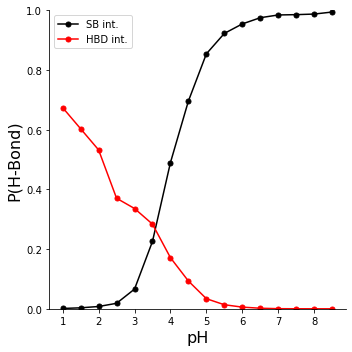

In [25]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

legends = ['SB int.', 'HBD int.']

axes.set_xlabel('pH', fontsize=16)
axes.set_ylabel('P(H-Bond)', fontsize=16)
axes.plot([x[0] for x in final_data], [y[1] for y in final_data], 'ko-', markersize = 5)
axes.plot([x[0] for x in final_data], [y[2] for y in final_data], 'ro-', markersize = 5)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.legend(legends)
axes.set_ylim(0, 1)


fig.tight_layout()
#plt.savefig("HB_D34.pdf")
plt.show()